# Support Vector Machine (SVM)

What is SVM?

    > Supervised Learning Algorithm
    > Classification Algorithms
    > most simple and elegent method for binary classification. 

Types of SVM

    1. Linear SVM (LSVM)
    2. Non-linear SVM (NLSVM)

Jargons related to SVM

    . Hyperplance / Decision boundry
        > finding Optimal hyperplance using D+ & D-.
    . Margins or margin lines
    . Maringal distance 
        * (D+) + (D-)
        > D+ (right)
        > D- (left)
    . Maximal Margin hyperplane
    . Supporting vectors / extreme datapoints
    . Kernel Tricks
            > converts a non-seprable problem into seprable problem.
            . Lower dimension
            . Higher Dimension
    . Generalisation error: 
            in statistics is generally the out-of-sample error, which measures how accurately 
            a model can predict values for previously unseen data.
    . Cost of Miscallculation
    . Soft margin 
    . Hard Margin
    . Gamma values

Real life applications of SVM

    > Face detection
    > Spam filtering
    > Text recognition
    > Image classification
    > Bioinformatics

Procedure of SVM Implemetation

Pros of SVM

    > Easy to understand
    > Easy to implement 
    > Easy to use 
    > Easy to interpret
    > small trainig dataset
    > 
    > 
    

SVM Visually in 2 mintures: 

    https://youtu.be/_YPScrckx28?si=zv8B3Jyc9AFV1c0l
SVM with use case: WScube Tech

    https://youtu.be/RiyMwjZ-joQ?si=P_Bble5_xEeRAFxG
    
Detailed Understanding of SVM
    https://youtu.be/pjvmVMDrzVU?si=F-8wHq3e7agJ7yer

Cons of SVM


Steps in All models

    1. Data Preparartion
    2. Feature selection
    3. Feature scaling if required
    4. Spliting of data into test and train
    5. Choosing model
    6. Training model with training data (Training phase)
    7. Testing model useing testing data (Predication phase)
    8. Measuring model perfomance.

## 1. Data Preparation:

Importing required packages

In [6]:
import pandas as pd

creating dataframe reading csv

In [7]:
df=pd.read_csv(r"Iris.csv")

Viewing dataframe

In [8]:
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df["Species"].nunique()

3

In [11]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

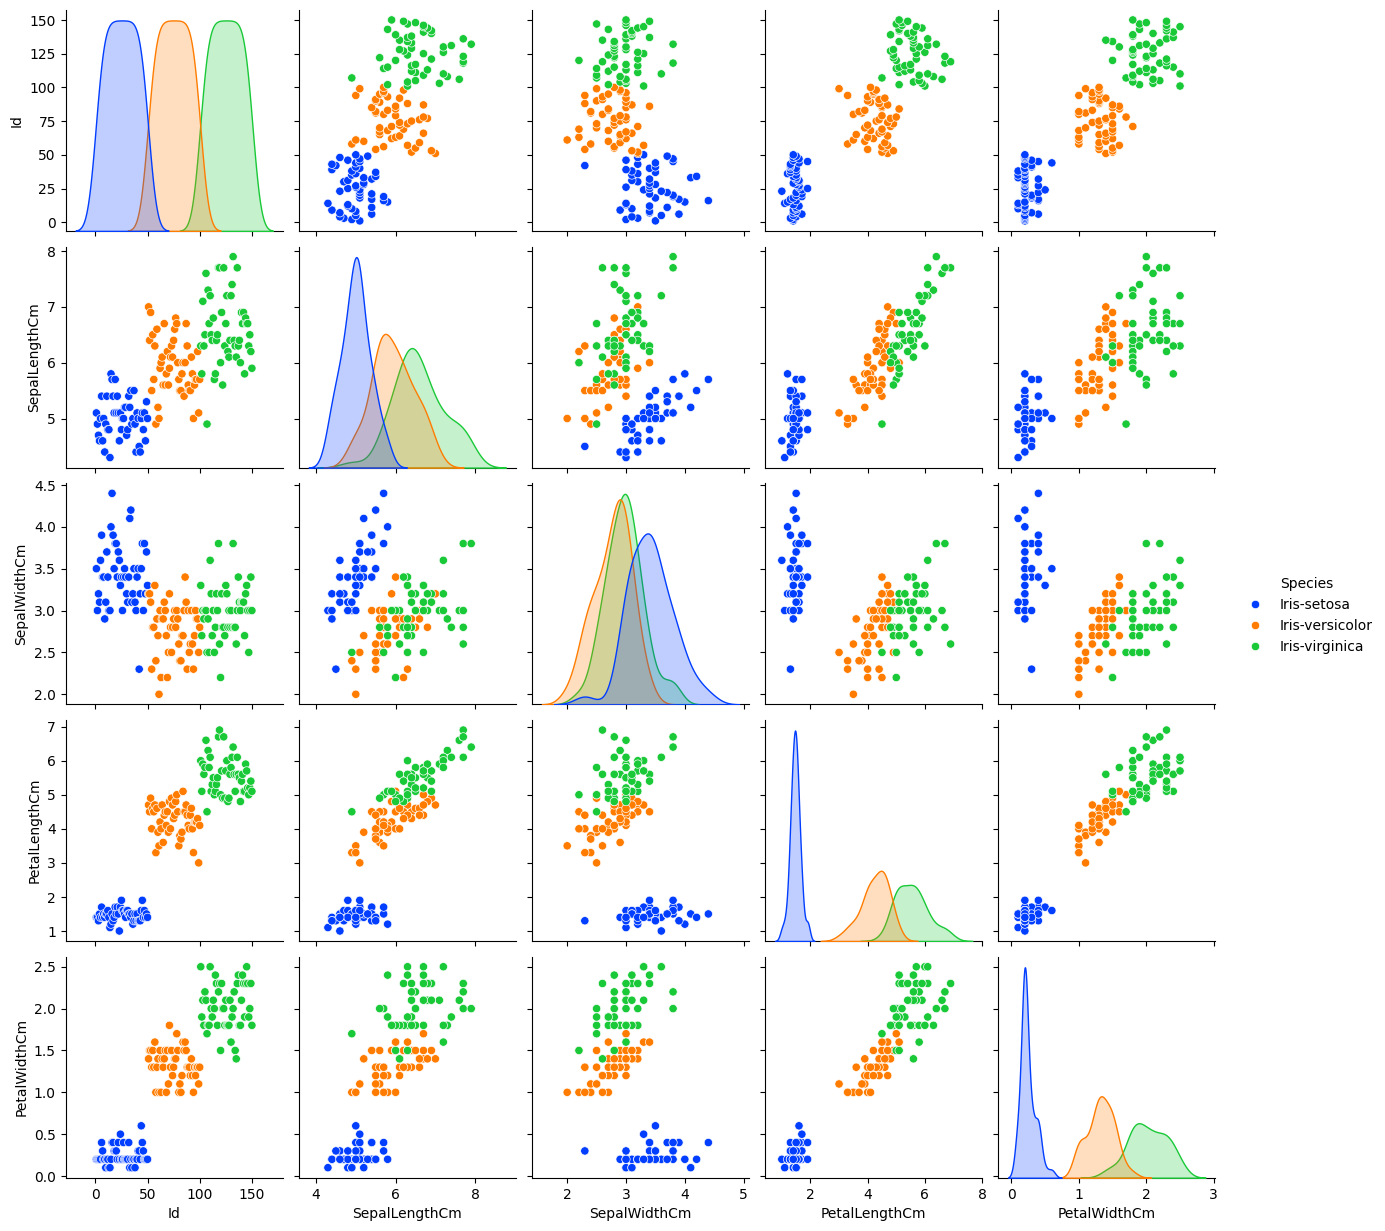

In [12]:
# import seaborn as sns
# sns.pairplot(df, hue="Species",palette="bright")

import seaborn as sns
df # dataset
y_ = df.Species
x_ = df.drop(['Species','Id'] ,axis=1)
sns.pairplot(df, hue="Species",palette="bright")

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

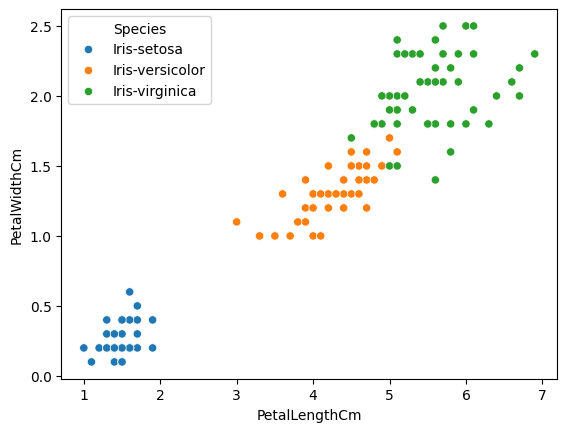

In [13]:
# import seaborn as sns
# df # dataset
# y_ = df.Species
# x_ = df.drop(['Species','Id'] ,axis=1)
# sns.pairplot(df, hue="Species",palette="bright")

x_axis=df["PetalLengthCm"]
y_axis=df["PetalWidthCm"]
sns.scatterplot(x=x_axis,y=y_axis,data=df, hue="Species")

## 2. Seperating dependent and independent variables / Feature selection

Independent Variables/ Features

In [14]:
# X=df.iloc[:,1:5]
# # X

In [15]:
S=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
S

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Dependent variabels

In [16]:
y=df.iloc[:,5]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [17]:
z=df["Species"]


## 3. Splitting data for test and train

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
S_train, S_test, z_train, z_test=train_test_split(S,z, test_size=0.3) # train/test=70/30

In [20]:
print(f"The lenght of X_train is {len(S_train)}")
print(f"The lenght of X_test is {len(S_test)}")

The lenght of X_train is 105
The lenght of X_test is 45


## 4. Choosing best model for problem under consideration

Import SVC

In [21]:
from sklearn.svm import SVC # svc= support vector classifier

Choosing the kernel function:
        1. Linear 
        2. Polynomial
        3. Radial based function

In [60]:
mdl=SVC(kernel="linear", C=2) # See performace matrix by changinging the kernam functional.

## 5. Training of model:

Training of model:
        > .fit() function is used to train model.

In [61]:
mdl.fit(S_train, z_train)

SVC(C=2, kernel='linear')

## 6. Testing model

Predicted Mode:
    In this phase, after traing the model, we feed the test data to get model predicted results. 

In [62]:
z_pred=mdl.predict(S_test)
print(z_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


## 7. Measuring model performance

In [63]:
mdl.score(S_test,z_test)

0.9333333333333333

In [64]:
mdl.score(S_test,z_pred)

1.0

In [65]:
# from sklearn.metrics import accuracy_score
# performance_test=accuracy_score(s_test, z_test)
# print(performance_test)

from sklearn.metrics import accuracy_score
performance_pred=accuracy_score(z_test, z_pred)
print(performance_pred)

0.9333333333333333


# End    